In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel(r'C:\Users\USER\Downloads\healthcare dataset.xlsx')

In [30]:
df.isnull().sum()

Location                        0
_Location_latitude              0
_Location_longitude             0
_Location_altitude              0
_Location_precision             0
Date and Time                   0
Age                             0
Gender                          0
Marital Status                  0
Children                        0
Employment Status               0
Monthly Household Income        0
Health Insurance                0
Last Hospital Visit (Months)    0
Insurance During Last Visit     0
Routine Check-up                0
Cancer Screening                0
_id                             0
_uuid                           0
_submission_time                0
_status                         0
__version__                     0
_index                          0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


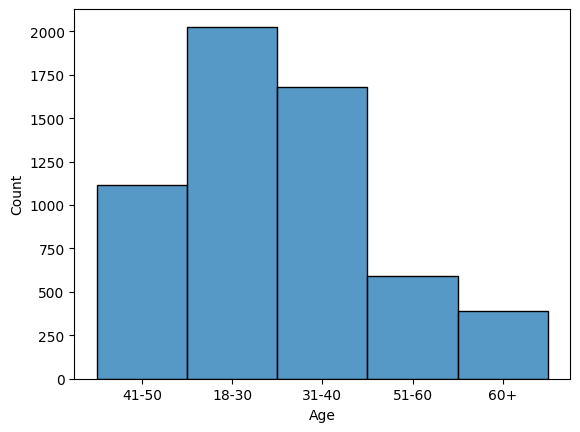

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'])
plt.show()


In [35]:
df.reset_index(drop=True, inplace=True)

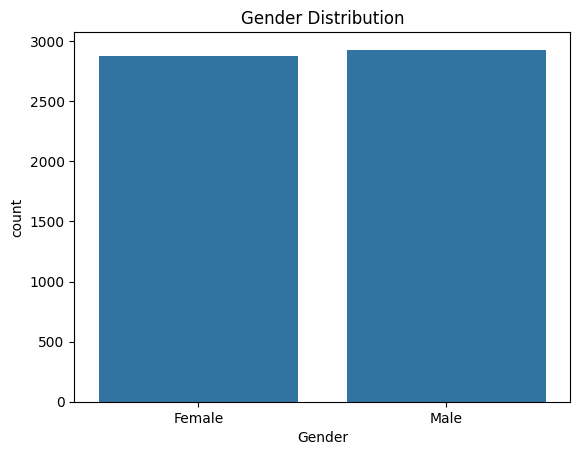

In [36]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


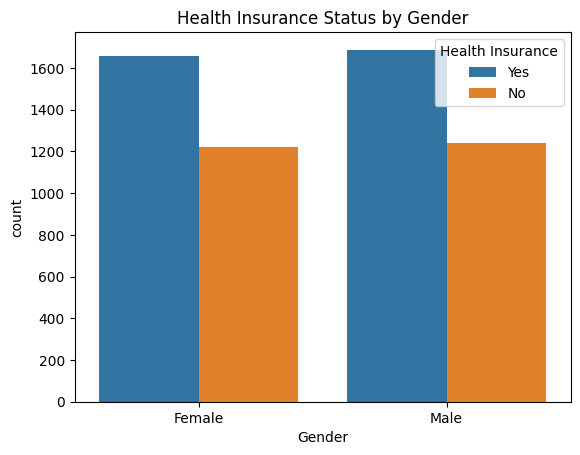

In [37]:
sns.countplot(x='Gender', hue='Health Insurance', data=df)
plt.title('Health Insurance Status by Gender')
plt.show()


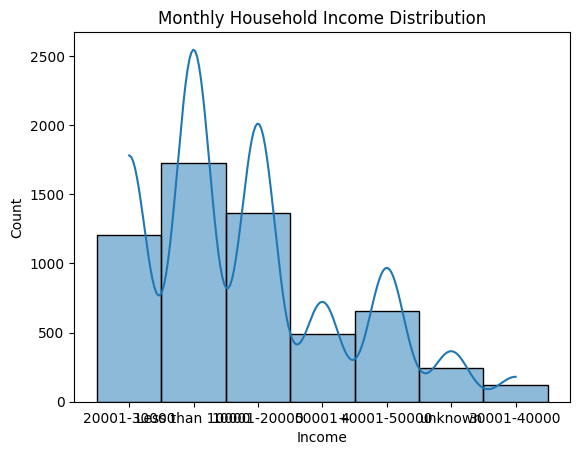

In [38]:
sns.histplot(df['Monthly Household Income'], bins=10, kde=True)
plt.title('Monthly Household Income Distribution')
plt.xlabel('Income')
plt.show()


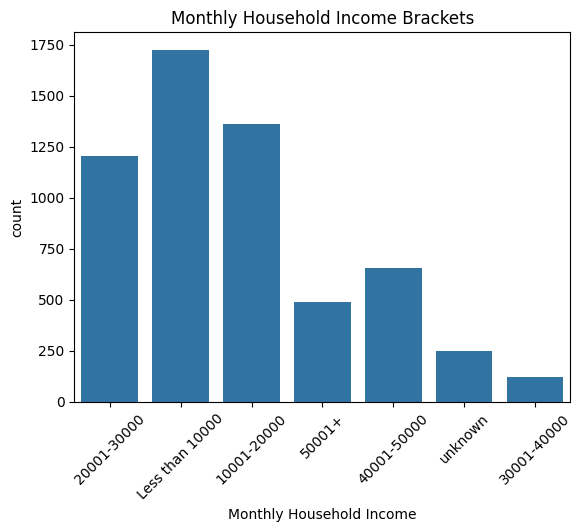

In [39]:
sns.countplot(x='Monthly Household Income', data=df)
plt.xticks(rotation=45)
plt.title('Monthly Household Income Brackets')
plt.show()


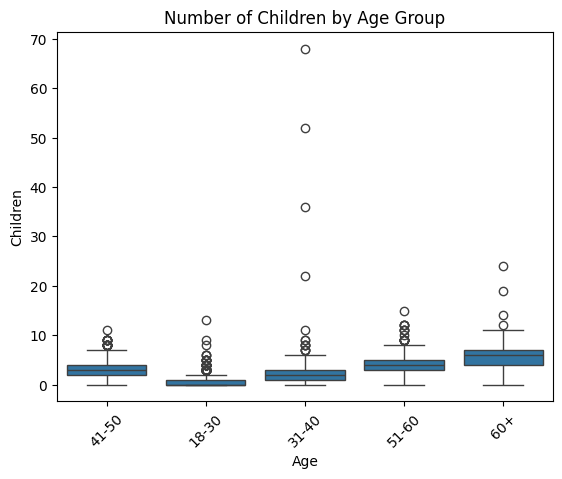

In [40]:
sns.boxplot(x='Age', y='Children', data=df)
plt.xticks(rotation=45)
plt.title('Number of Children by Age Group')
plt.show()


In [29]:
df = df.drop(columns=['_validation_status', '_notes', '_submitted_by'])


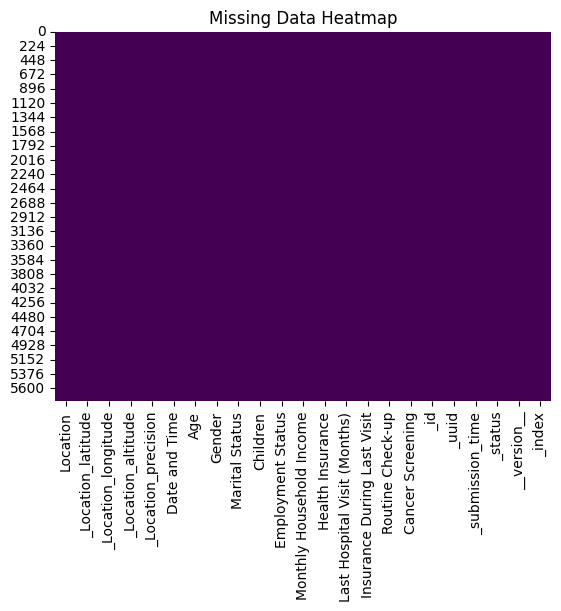

In [42]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

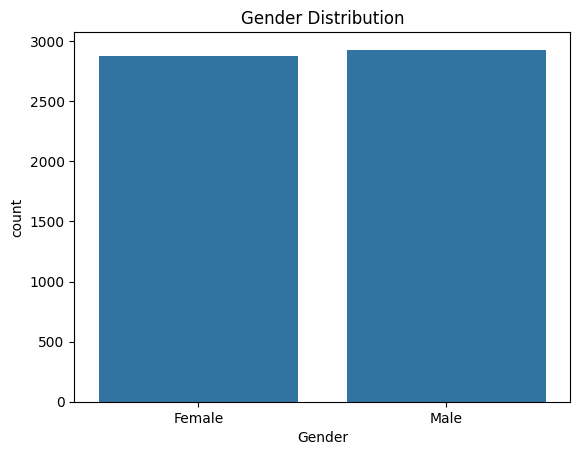

In [43]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


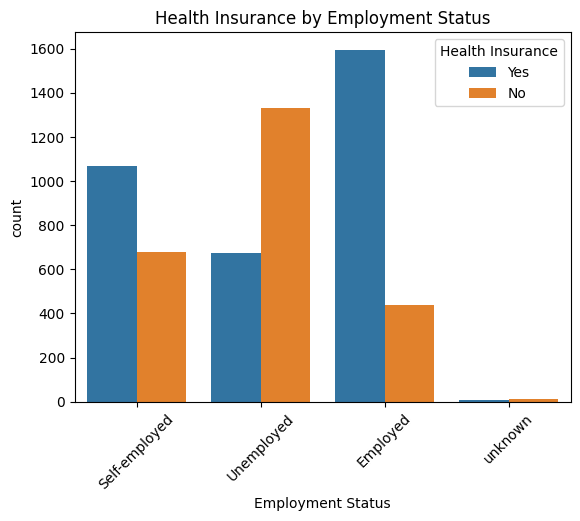

In [44]:
sns.countplot(x='Employment Status', hue='Health Insurance', data=df)
plt.xticks(rotation=45)
plt.title('Health Insurance by Employment Status')
plt.show()


In [48]:
import os

# Create 'plots' directory if it doesn't exist
os.makedirs("plots", exist_ok=True)

# Now save the figure
plt.savefig('plots/filename.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

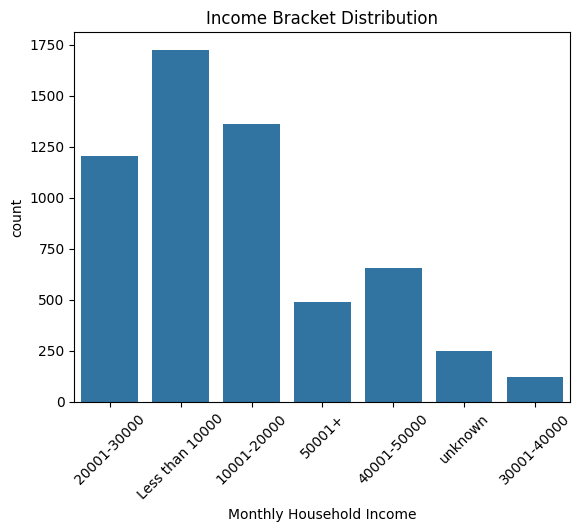

In [45]:
sns.countplot(x='Monthly Household Income', data=df)
plt.xticks(rotation=45)
plt.title('Income Bracket Distribution')
plt.show()


In [46]:
df.to_csv("cleaned_dataset.csv", index=False)


In [3]:
print(df.columns)

Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'How many children do you have, if any?',
       'Employment Status', 'Monthly Household Income',
       'Have you ever had health insurance?', 'If yes, which insurance cover?',
       'When was the last time you visited a hospital for medical treatment? (In Months)',
       'Did you have health insurance during your last hospital visit?',
       'Have you ever had a routine check-up with a doctor or healthcare provider?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
       'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
       'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?',
       'Your Picture', 'Your Picture_URL', '_id'

In [27]:
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Monthly Household Income'] = df['Monthly Household Income'].fillna('unknown')
df['Employment Status']= df['Employment Status'].fillna('unknown')
df['Date and Time'] = df['Date and Time'].fillna(df['Date and Time'].mode()[0])
df['Health Insurance'] = df['Health Insurance'].fillna(df['Health Insurance'].mode()[0])
df['Last Hospital Visit (Months)'] = df['Last Hospital Visit (Months)'].fillna(
    df['Last Hospital Visit (Months)'].median())
for col in ['Insurance During Last Visit', 'Routine Check-up', 'Cancer Screening']:
    df[col] = df[col].fillna(df[col].mode()[0])
df['Children'] = df['Children'].fillna(0).astype('Int64')

In [4]:
def rename_columns(df, old_names, new_names):
    if len(old_names) != len(new_names):
        raise ValueError("Length of old_names and new_names must be the same.")
    mapping = dict(zip(old_names, new_names))
    df.rename(columns=mapping, inplace=True)
    return df

In [5]:
old_names = [
    'How many children do you have, if any?',
    'Have you ever had health insurance?',
    'If yes, which insurance cover?',
    'When was the last time you visited a hospital for medical treatment? (In Months)',
    'Did you have health insurance during your last hospital visit?',
    'Have you ever had a routine check-up with a doctor or healthcare provider?',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?'
]
new_names = [
    'Children',
    'Health Insurance',
    'Insurance Cover',
    'Last Hospital Visit (Months)',
    'Insurance During Last Visit',
    'Routine Check-up',
    'Routine Check-up Period (Years)',
    'Cancer Screening',
    'Cancer Screening Period (Years)'
]


In [6]:
rename_columns(df, old_names, new_names)
print(df.columns)

Index(['Location', '_Location_latitude', '_Location_longitude',
       '_Location_altitude', '_Location_precision', 'Date and Time', 'Age',
       'Gender', 'Marital Status', 'Children', 'Employment Status',
       'Monthly Household Income', 'Health Insurance', 'Insurance Cover',
       'Last Hospital Visit (Months)', 'Insurance During Last Visit',
       'Routine Check-up', 'Routine Check-up Period (Years)',
       'Cancer Screening', 'Cancer Screening Period (Years)', 'Your Picture',
       'Your Picture_URL', '_id', '_uuid', '_submission_time',
       '_validation_status', '_notes', '_status', '_submitted_by',
       '__version__', '_tags', '_index'],
      dtype='object')


In [7]:
df = df.drop(columns=[
    'Your Picture',
    'Your Picture_URL',
    '_tags',
    'Insurance Cover',
    'Routine Check-up Period (Years)',
    'Cancer Screening Period (Years)'
],)


In [8]:
df = df.dropna(subset=['Location','_Location_latitude','_Location_longitude','_Location_precision','_Location_altitude'])